# Project #15: Twitter hate speech detection 2

## 1. Introduction


The goal of our project is to find efficient methods for identifying hate speech on twitter. Our aim is to find a set of features that could be used to identify hate speech content.

For our analysis, we have gathered two data sets. The first data set was collected by searching for tweets containing specific hashtags (topics). The second data set was collected from active twitter users that frequently posted hate speech content. Both data sets were obtained using Twitter API and the search-tweets pytho library.

Full source code and data sets are available at: https://github.com/tokuosma/NLP2019


In [1]:
# Standard libraries
import sys; sys.path.insert(0, '..') # add parent folder to path

#3rd. party
import pandas as pd
import matplotlib.pyplot as plt
import emojis 

# Custom scripts
import liwc_empath
import util

# Dictionary keys
CATEGORY_HATE = "hate_speech"
CATEGORY_NON_HATE = "non_hate_speech"

ModuleNotFoundError: No module named 'emojis'

## 2. Data sets

### Data-set 1: Hate speech hash tags
The first data set was collected by searching for tweets containing specific hashtags that were provided to us in the project assignment. The hash tags were: #terrorist, #radicalist, #islamophobia, #extremist, and #bombing. 


In [ ]:
# Read labeled tweets with specific hash tags
tweets_hashtag = {}
tweets_hashtag["bombing"] = util.read_tweets(["../Data/tweets_bombing_labeled.json"])
tweets_hashtag["extremist"] = util.read_tweets(["../Data/tweets_extremist_labeled.json"])
tweets_hashtag["islamophobia"] = util.read_tweets(["../Data/tweets_islamophobia_labeled.json"])
tweets_hashtag["radicalist"] = util.read_tweets(["../Data/tweets_radicalist_labeled.json"])
tweets_hashtag["terrorist"] = util.read_tweets(["../Data/tweets_terrorist_labeled.json"])

print('Hashtag summaries: ')
for key in tweets_hashtag.keys():
    util.print_hashtag_summary(key, tweets_hashtag[key])

# Read the combined labeled data set
labeled_tweets = util.read_tweets(["../Data/tweets_labeled_combined.json"])
print('All labeled tweets:')
util.print_hashtag_summary('ALL', labeled_tweets)

## 3. Characterization of the labeled data set

### 3.1 Sentiment analysis
TEXT HERE

In [2]:
# CODE HERE

### 3.2 LIWC Features

To analyze the topics and categories common to hate and non hate speech we use the Empath library. Empath is an open source alternative to proprietary LIWC software. The library offers tools that can extract themes and topics from a given text. The library come with a default set of categories but new categories can be added by the users. We will use the default categories.

The following code uses the labeled tweet data set to extract the most common topics from the labeled tweet data sets. Each topic is then given a normalized score which is simply the number of mentions a topic has divided by the total number of tweets in the category.

In [3]:
from liwc_empath import analyze_tweets_liwc

liwc_categories = analyze_tweets_liwc(labeled_tweets)

print("Top 20 topics in hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_HATE][i][1],4)))
    
print("\nTop 20 topics in non hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_NON_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_NON_HATE][i][1],4)))

# Draw top 20 categories    
categories_hate = [x for (x,y) in liwc_categories[CATEGORY_HATE][:20]]                                      
values_hate = [y for (x,y) in liwc_categories[CATEGORY_HATE][:20]]

categories_non_hate = [x for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]                                     
values_non_hate = [y for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]

fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(categories_hate, values_hate)
axs[0].set_title("Top 20 LIWC Catgories: Hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(categories_non_hate, values_non_hate)
axs[1].set_title("Top 20 LIWC Catgories: Non hate speech tweets")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()



NameError: name 'labeled_tweets' is not defined

Considering the hashtags that were used to collect the tweets, it is not suprising to find negative and violent topics are present in both data sets. The topic hate is more pronounced in the hate speech data set. Suprisingly, themes like children, family and love are some of the most common topics in the hate data set.

### 3.3 Emoticon usage
We will investigate the usage of emoticons in hate and non hate tweets by examining the types of emoticons used and their frequency. 

In [4]:
from count_emoticons import count_tweet_emoticons

# Retuns two lists containing the types of emoticons and their frequency in both hate and non hate categories
tweet_emoticons = count_tweet_emoticons(labeled_tweets)

print("Emoticon usage in hate and non hate tweets:\n")

print("Total number of emoticons in hate speech tweets: " + str(sum([v for (k,v) in tweet_emoticons[CATEGORY_HATE]])))
print("Total number of emoticons in non hate speech tweets: " + str(sum([v for (k,v) in tweet_emoticons[CATEGORY_NON_HATE]])))

print("\nEmoticons in hate speech:")
for emoticon in tweet_emoticons[CATEGORY_HATE]:
    print(emojis.encode(emoticon[0]) + ": " + str(emoticon[1]) + ())

print("\nEmoticons in non hate speech:")
for emoticon in tweet_emoticons[CATEGORY_NON_HATE]:
    print(emojis.encode(emoticon[0]) + ": " + str(emoticon[1]))
    
emoticons_hate = [x for (x,y) in tweet_emoticons[CATEGORY_HATE]]
emoticons_counts_hate = [y for (x,y) in tweet_emoticons[CATEGORY_HATE]]

emoticons_non_hate = [x for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
emoticons_counts_non_hate = [y for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
    
    
fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(emoticons_hate, emoticons_counts_hate)
axs[0].set_title("Emoticon usage in hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(emoticons_non_hate, emoticons_counts_non_hate)
axs[1].set_title("Emoticon usage in non hate speech tweets (Top 20)")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()


ModuleNotFoundError: No module named 'emojis'

The hate speech tweets only contained a total of 43 emoticons which makes interpreting the results difficult. The most common emoticons used in the hate speech, :joy: and :pout:,  don't really stand out and are frequently used in non hate context, although both seem to be more common in our hate speech data set. 

The two most common emoticons in the non hate speech data set were :exit: and :bell:. It turns out both emoticons were frequently used by opponents of Jeremy Corbyn, who were active during the British general election that occured in december, at the same time we were collection our data sets. 

### 3.4 Named entities
TEXT HERE

In [5]:
# CODE HERE

### 3.5 Named phrases
TEXT HERE

## 4. Radicalization of active hate speakers

file: ..\Data\tweets_user_ViidarUkonpoika.json
mean sentiment percentile: 0.5246912423383495
volume of negative posts: 0.218
volume of very negative posts:0.014
number of days active: 77
radicalization score: 11.388377331838583



file: ..\Data\tweets_user_UKInfidel.json
mean sentiment percentile: 0.5016298412698412
volume of negative posts: 0.22
volume of very negative posts:0.022
number of days active: 503
radicalization score: 135.00855660731082



file: ..\Data\tweets_user_DrDavidDuke.json
mean sentiment percentile: 0.5222739147067796
volume of negative posts: 0.279
volume of very negative posts:0.012
number of days active: 246
radicalization score: 40.46910414477672





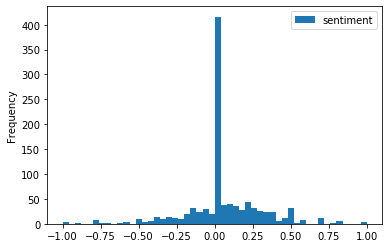

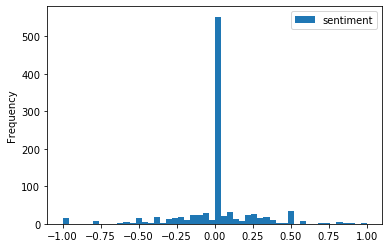

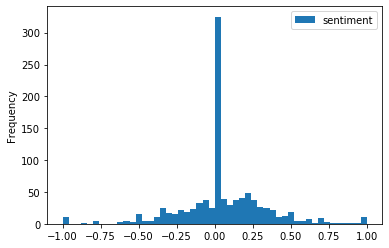

In [8]:
# CODE HERE
from analyse_user import analyse_users
import pandas as pd

first_user = analyse_users('..\\Data\\tweets_user_ViidarUkonpoika.json')
second_user = analyse_users('..\\Data\\tweets_user_UKInfidel.json')
third_user = analyse_users('..\\Data\\tweets_user_DrDavidDuke.json')


print('file: ' + first_user["source_file"])
print('mean sentiment percentile: ' + str(first_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(first_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(first_user["vol_very_neg_posts"]))
print('number of days active: '+ str(first_user["days_active"]))
print('radicalization score: '+ str(first_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in first_user["very_neg_tweets_and_sentiments"]]


print('file: ' + second_user["source_file"])
print('mean sentiment percentile: ' + str(second_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(second_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(second_user["vol_very_neg_posts"]))
print('number of days active: '+ str(second_user["days_active"]))
print('radicalization score: '+ str(second_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in second_user["very_neg_tweets_and_sentiments"]]


print('file: ' + third_user["source_file"])
print('mean sentiment percentile: ' + str(third_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(third_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(third_user["vol_very_neg_posts"]))
print('number of days active: '+ str(third_user["days_active"]))
print('radicalization score: '+ str(third_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in third_user["very_neg_tweets_and_sentiments"]]

first_df = pd.DataFrame(first_user["sentiments"], columns = ['sentiment'])
first_df.plot.hist(bins=50)

second_df = pd.DataFrame(second_user["sentiments"], columns = ['sentiment'])
second_df.plot.hist(bins=50)

third_df = pd.DataFrame(third_user["sentiments"], columns = ['sentiment'])
third_df.plot.hist(bins=50)